In [13]:
# 데이터 불러오기
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



In [15]:
# 데이터 불러오기
raw_wine = datasets.load_wine()

# 피쳐, 타깃 데이터 지정
x = raw_wine.data
y = raw_wine.target

In [17]:
# 트레이닝 / 테스트 데이터 분할
x_tn, x_te, y_tn, y_te = train_test_split(x,y,random_state = 1)

In [20]:
# 데이터 표준화
std_scale = StandardScaler()
std_scale.fit(x_tn)
x_tn_std = std_scale.transform(x_tn)
x_te_std = std_scale.transform(x_te)

In [21]:
# LDA
lda = LinearDiscriminantAnalysis() 
# 옵션으로 n_compoents 값을 통해 원하는 차원 설정 가능, but 기본값 = '최솟값(클래스 개수-1,피처 개수)'
# 와인 데이터 클래스 수 = 3, 피처 개수 13 => n_compoents = min(3-1=2,13) = 2

lda.fit(x_tn_std, y_tn)
x_tn_lda = lda.transform(x_tn_std)
x_te_lda = lda.transform(x_te_std)

In [22]:
print(x_tn_std.shape)
print(x_tn_lda.shape)

(133, 13)
(133, 2)


In [23]:
# LDA 상수항
print(lda.intercept_)

[ -9.49063922  -3.6792656  -10.65310672]


In [32]:
# LDA 가중 벡터
print(lda.coef_)

[[ 2.11536841  0.34171834  1.60756274 -2.62777005 -0.02954383 -1.92461007
   5.43612614  0.30142527 -0.66723405 -2.08948728  0.53569108  3.06011656
   5.45318503]
 [-1.18707715 -0.97635273 -1.64104916  1.19614378  0.22114803  0.2969019
   1.13721801  0.4338713   0.33425086 -1.57541361  0.56544507 -0.17730553
  -2.34856045]
 [-0.59547207  1.01875252  0.59754164  1.13544231 -0.28238675  1.65463974
  -7.48134065 -0.94177595  0.24492236  4.49319245 -1.38150969 -3.04974421
  -2.54627163]]


In [33]:
# LDA 적용된 데이터 프레임
lda_colums = ['lda_comp1', 'lda_comp2']
x_tn_lda_df = pd.DataFrame(x_tn_lda, columns = lda_colums)
x_tn_lda_df['target'] = y_tn
x_tn_lda_df.head(5)

,lda_comp1,lda_comp2,target
0,-2.563293,-0.503212,0
1,-0.646015,-2.169761,1
2,-3.981901,1.621584,0
3,-5.956216,3.878140,0
4,-4.047839,2.335699,0


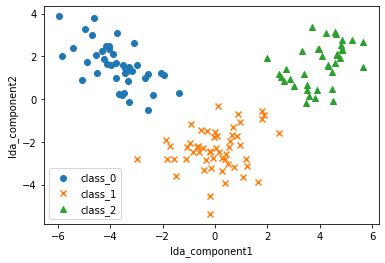

In [34]:
df = x_tn_lda_df
markers = ['o','x','^']

for i, mark in enumerate(markers):
    x_i = df[df['target'] == i]
    target_i = raw_wine.target_names[i]
    x1 = x_i['lda_comp1']
    x2 = x_i['lda_comp2']
    plt.scatter(x1,x2,marker=mark,label=target_i)

plt.xlabel('lda_component1')
plt.ylabel('lda_component2')
plt.legend()
plt.show()

In [35]:
# 학습
clf_rf_lda = RandomForestClassifier(max_depth=2, random_state=0)

clf_rf_lda.fit(x_tn_lda, y_tn)

RandomForestClassifier(max_depth=2, random_state=0)

In [36]:
# 예측
pred_rf_lda = clf_rf_lda.predict(x_te_lda)

In [37]:
# LDA 적용 후 정확도
accuracy_lda = accuracy_score(y_te, pred_rf_lda)
print(accuracy_lda)

1.0
